In [145]:
import pandas as pd
import patsy as ps
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn import preprocessing

listing = pd.read_csv('listings.csv')


In [146]:
listing.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [147]:
df = listing[['host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood','host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price',  'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

In [148]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print(num_rows,num_cols)

3818 51


In [149]:
#pre process the data
df = df.dropna(subset = ['price'], how='any')
df["price"]=df.price.str.replace('$','').str.replace(',','').astype(float)
df["security_deposit"]=df.security_deposit.str.replace('$','').str.replace(',','').astype(float)
df["cleaning_fee"]=df.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)
df["host_acceptance_rate"]=df.host_acceptance_rate.str.replace('%','').str.replace(',','').astype(float)
df["extra_people"]=df.extra_people.str.replace('$','').str.replace(',','').astype(float)
df['host_acceptance_rate'].fillna(df.host_acceptance_rate.mean(), inplace=True)
df['host_neighbourhood'].fillna("unknown", inplace=True)
df['square_feet'].fillna(df.square_feet.mean(), inplace=True)
df['security_deposit'].fillna(df.security_deposit.mean(), inplace=True)
df['cleaning_fee'].fillna(df.cleaning_fee.mean(), inplace=True)
df['review_scores_rating'].fillna(df.review_scores_rating.mean(), inplace=True)
df['review_scores_accuracy'].fillna(df.review_scores_accuracy.mean(), inplace=True)
df['review_scores_cleanliness'].fillna(df.review_scores_cleanliness.mean(), inplace=True)
df['review_scores_checkin'].fillna(df.review_scores_checkin.mean(), inplace=True)
df['review_scores_communication'].fillna(df.review_scores_communication.mean(), inplace=True)
df['review_scores_location'].fillna(df.review_scores_location.mean(), inplace=True)
df['review_scores_value'].fillna(df.review_scores_value.mean(), inplace=True)
df['review_scores_value'].fillna(df.review_scores_value.mean(), inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

df.head()

,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,100.000000,f,Queen Anne,3.0,t,t,Queen Anne,Seattle,WA,98119,...,10.000000,10.000000,9.000000,10.000000,f,moderate,f,f,2,4.07
1,100.000000,t,Queen Anne,6.0,t,t,Queen Anne,Seattle,WA,98119,...,10.000000,10.000000,10.000000,10.000000,f,strict,t,t,6,1.48
2,100.000000,f,Queen Anne,2.0,t,t,Queen Anne,Seattle,WA,98119,...,10.000000,10.000000,10.000000,10.000000,f,strict,f,f,2,1.15
3,99.967159,f,Queen Anne,1.0,t,t,Queen Anne,Seattle,WA,98119,...,9.786709,9.809599,9.608916,9.452245,f,flexible,f,f,1,0.00
4,99.967159,f,Queen Anne,2.0,t,t,Queen Anne,Seattle,WA,98119,...,10.000000,10.000000,9.000000,9.000000,f,strict,f,f,1,0.89


In [150]:
#Make the linear model, vars are Proerty Type, Room Type, Bed Type, Zip Code, Nr of People, Nr of Bathrooms, Nr of Bedrooms, Nr of Beds, Bed Type, Nr of Guests in the Reservation, Extra People
y, X = ps.dmatrices("price ~ 1 + C(property_type)+ C(room_type)+ C(bed_type)+ C(zipcode)+"
                    "  accommodates + bathrooms + bedrooms + beds + bed_type +"
                    " guests_included + extra_people ",df, return_type='dataframe')

In [151]:
#Split the data into a train and test set, test set is 30% of total dataset
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=.30, random_state=42)


In [152]:
#Choose the model characteristics, eg linear, quadratic or other
lm_model = LinearRegression(normalize=False)  # Instantiate
lm_model.fit(X_train.values, y_train.values)  # Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
# Predict and score the model
y_test_preds = lm_model.predict(X_test.values)

y_test_preds

array([[4.48895595],
       [4.12895238],
       [4.37948801],
       ...,
       [4.10516441],
       [4.55444153],
       [3.82441593]])

In [154]:
# Rsquared and y_test
rsquared_score = r2_score(y_test.values, y_test_preds)
length_y_test = len(y_test)
print(rsquared_score)

0.6506343347372665


Text(0, 0.5, 'Model weights')

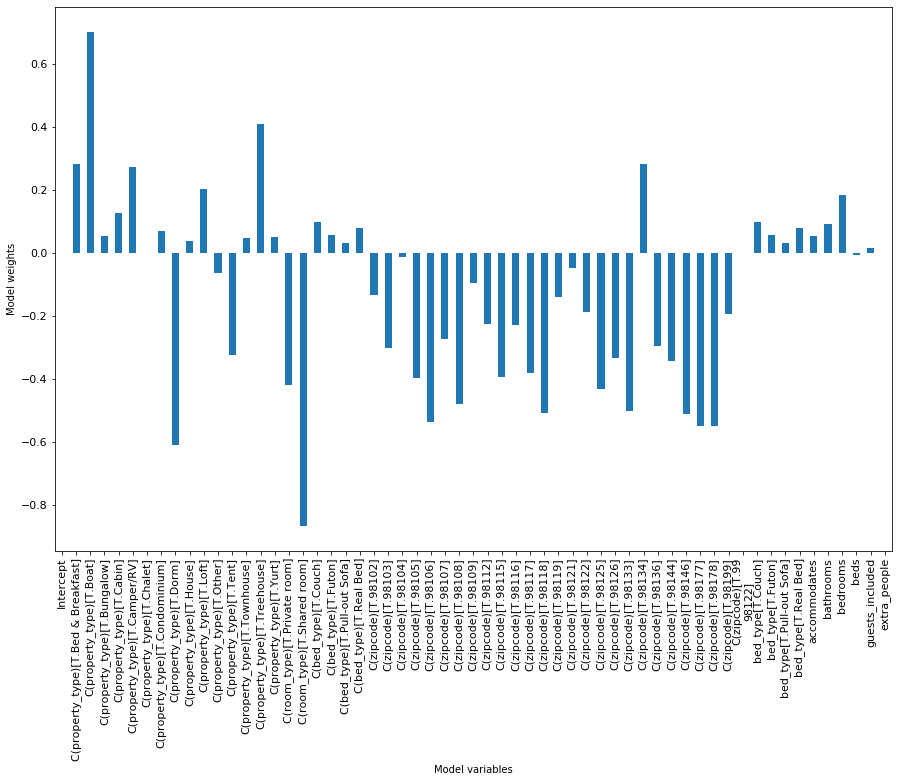

In [155]:
#now let's make some plots!
import matplotlib.pyplot as plt
coeff_df = pd.Series(lm_model.coef_[0], index=X.columns)
coeff_df.plot.bar(rot=90,figsize=[15,10],fontsize=11)
plt.xlabel("Model variables")
plt.ylabel("Model weights")


Text(0, 0.5, 'Number of properties in Seattle')

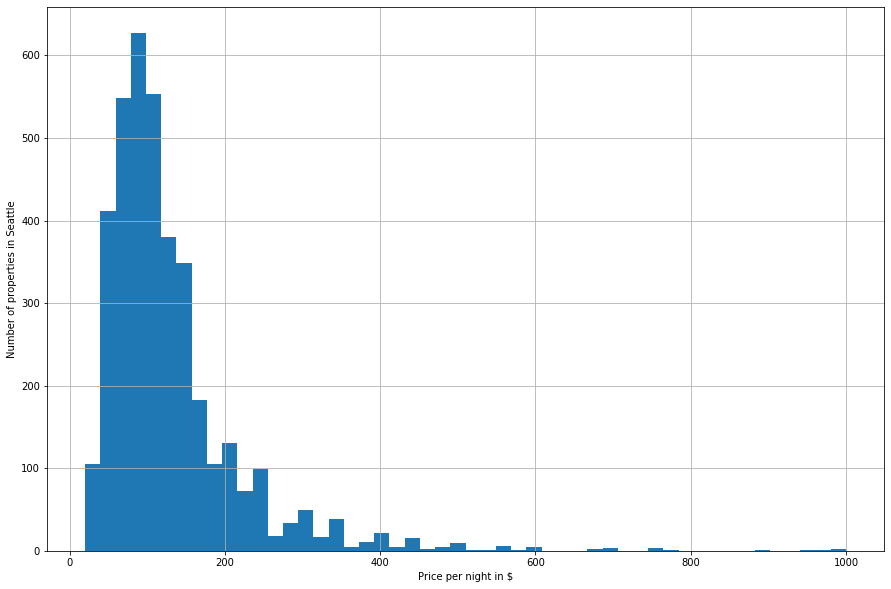

In [156]:
#Plot the price range for Seattle
df.price.hist(bins=50,figsize=[15,10])
plt.xlabel("Price per night in $")
plt.ylabel("Number of properties in Seattle")

                                   price
neighbourhood_group_cleansed            
Ballard                       124.682609
Beacon Hill                    94.669492
Capitol Hill                  130.592593
Cascade                       140.101124
Central Area                  128.338753


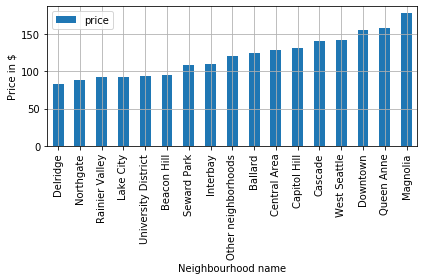

In [157]:
#Plot the price range per neighborhood
price_neighbourhood = df.groupby(['neighbourhood_group_cleansed']).agg({'price':'mean'})
print(price_neighbourhood.head())
price_neighbourhood_sorted=price_neighbourhood.sort_values(by=['price']) #arange from min to max
price_neighbourhood_sorted.plot.bar(grid=True)
plt.ylabel('Price in $')
plt.xlabel('Neighbourhood name')
plt.tight_layout()

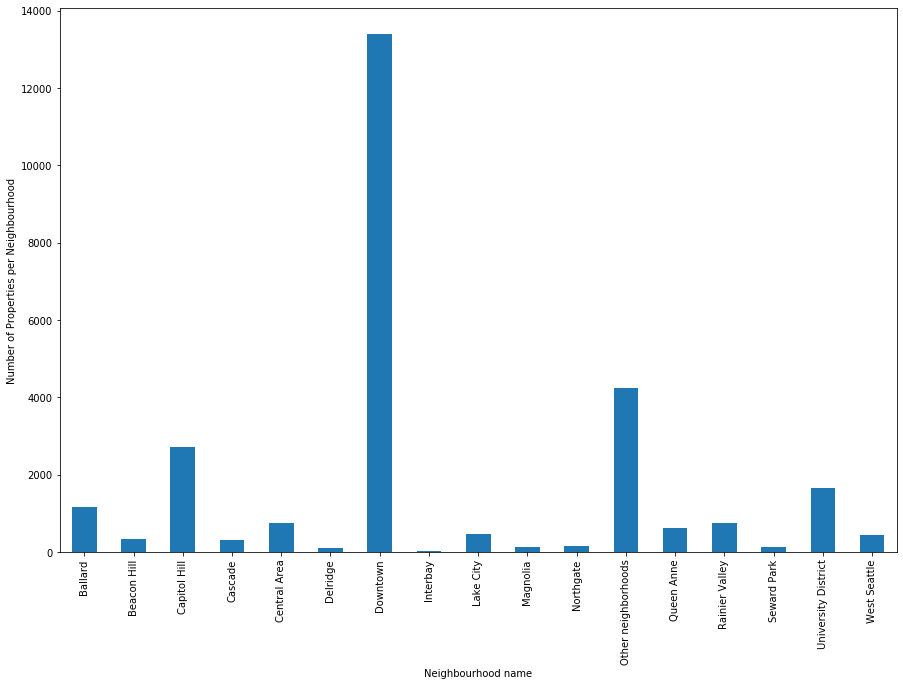

In [158]:
#Plot the number of properties per neighbourhood
nr_in_neighbourhood = df.groupby(['neighbourhood_group_cleansed']).sum()
nr_in_neighbourhood["host_listings_count"].plot.bar(legend=None,fontsize=10,figsize=[15,10])
plt.xlabel('Neighbourhood name')
plt.ylabel('Number of Properties per Neighbourhood')
plt.show()

In [177]:
from sklearn import linear_model
#Choose the model characteristics, eg linear, quadratic or other
lm_model1 = linear_model.Lasso(alpha=0.001)  # Instantiate
lm_model1.fit(X_train, y_train)  # Fit

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
# Predict and score the model
y_test_preds = lm_model1.predict(X_test)

y_test_preds # note that we are fitting to log(prices)

array([4.324809  , 4.11601897, 4.38858314, ..., 4.14310036, 4.55413049,
       3.78943022])

In [179]:
# Rsquared and y_test
rsquared_score = r2_score(y_test.values, y_test_preds)
length_y_test = len(y_test)
print(rsquared_score)

0.6446198707734392


Text(0, 0.5, 'Model weights')

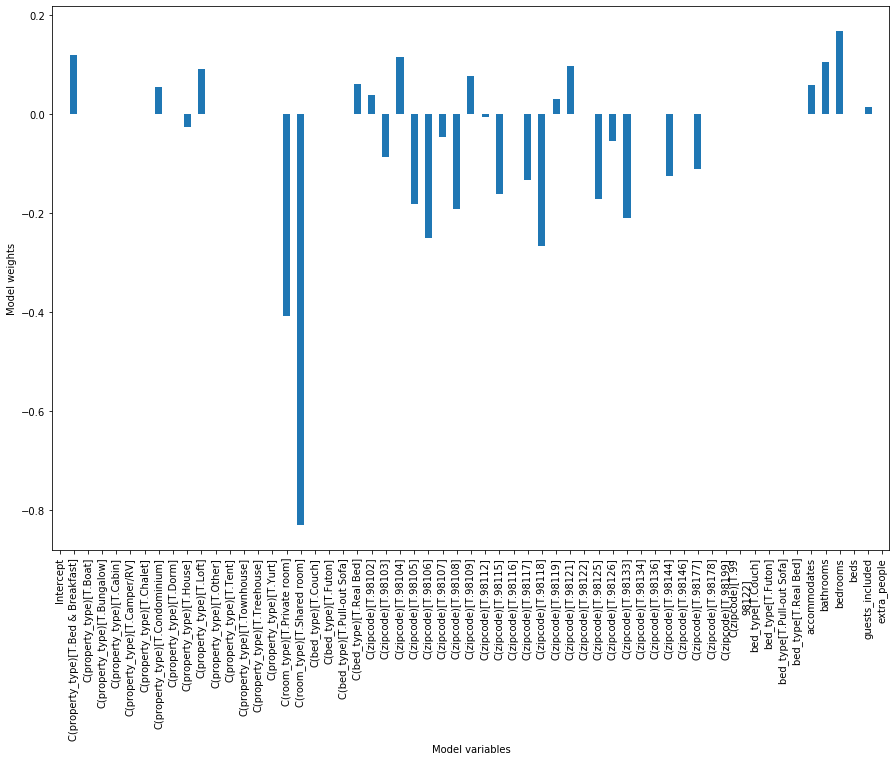

In [229]:
coeff_df_lasso = pd.Series(lm_model1.coef_, index=X.columns)
coeff_df_lasso.plot.bar(figsize=[15,10])
plt.xlabel("Model variables")
plt.ylabel("Model weights")

Can you compare the coefficients of our linear model with and without Lasso regularisation? Do you see a difference?
Some of the weights of the model have shrank to zero. This is because the model decided they have poor predictive power and did not use them to make predictions on the test set.